In [18]:
import pandas as pd

# Membaca file CSV langsung dari direktori saat ini
df = pd.read_csv("review_byond_playstore.csv")

# Menampilkan DataFrame
df.head()

,Review ID,Username,Rating,Review Text,Date
0,6b4af182-7d0a-4b24-a406-b6858709709a,Pengguna Google,5,"menurut saya aplikasi ini sudah cukup baik, fi...",2025-09-16 02:55:03
1,3dd1dc9b-4c11-4d83-86f7-7e81a071237b,Pengguna Google,5,"aplikasi ini fiturnya lengkap,bisa bayar semua...",2025-09-16 02:51:01
2,ec205cfe-9a74-46e3-9139-40a3dd08a246,Pengguna Google,5,Sangat Membantu untuk Keperluan Sehari hari,2025-09-16 02:45:16
3,ca80546d-2e6f-4c94-9000-d6c19d9079f7,Pengguna Google,1,Aplikasi belum ready atau system yang belum re...,2025-09-16 02:43:21
4,d660254a-9834-4184-94a5-a6704ed80e5e,Pengguna Google,5,semoga bermanfaat,2025-09-16 02:41:37


In [19]:
df_filtered = df.copy()

In [20]:
# Cek Struktur DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44832 entries, 0 to 44831
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    44832 non-null  object
 1   Username     44832 non-null  object
 2   Rating       44832 non-null  int64 
 3   Review Text  44832 non-null  object
 4   Date         44832 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [21]:
df.shape

(44832, 5)

In [22]:
# Cek Nilai Kosong atau Missing Value
df.isnull().sum()

Review ID      0
Username       0
Rating         0
Review Text    0
Date           0
dtype: int64

In [23]:
# Cek dan hapus duplikasi data
# Jumlah duplikat
df.duplicated().sum()

np.int64(0)

In [24]:
# Hapus duplikat
df = df.drop_duplicates()

df.shape

(44832, 5)

# ⚙️ 3. Modify

Tahapan **Modify** berfokus pada pembersihan dan penyeragaman teks sebelum digunakan dalam pemodelan.  
Langkah yang dilakukan mencakup:
- **Case Folding** → mengubah seluruh teks menjadi huruf kecil agar konsisten.  
- **Cleaning** → menghapus URL, angka, tanda baca, serta karakter yang tidak diperlukan menggunakan *regular expression*.  
- **Normalisasi Kata** → menstandarkan bentuk kata agar sesuai dengan struktur bahasa yang benar.  

Tahapan ini memastikan data teks telah bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

📚 Library yang Digunakan pada Tahap Modify

Pada tahap *Modify*, digunakan beberapa *library* utama untuk mendukung proses pembersihan dan penyeragaman teks sebelum dilakukan pelatihan model *IndoBERT*.  

Library yang digunakan meliputi:  
- **Pandas** → untuk membaca, mengelola, dan memanipulasi dataset dalam bentuk *DataFrame*, sehingga memudahkan pengolahan teks secara terstruktur.  
- **NumPy** → digunakan untuk operasi numerik serta mendukung manajemen array pada proses transformasi teks.  
- **re (Regular Expression)** → untuk melakukan proses *cleaning*, seperti menghapus URL, angka, tanda baca, simbol, dan karakter tidak relevan dari teks.  
- **string** → digunakan untuk menghapus tanda baca dan karakter khusus pada tahap *cleaning*.  

Kombinasi *library* tersebut memastikan proses *case folding*, *cleaning*, dan *normalisasi kata* berjalan efisien sehingga menghasilkan teks yang bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

In [25]:
!pip install pandas numpy

In [26]:
import pandas as pd
import numpy as np
import re
import string

##  3.1 Case Folding

In [27]:
# Mengganti nama kolom 'full_text' menjadi 'comment'
df_filtered = df_filtered.rename(columns={'Review Text': 'comment'})

# Membuat kolom baru hasil case folding dari kolom 'comment'
df_filtered['case_folding'] = df_filtered['comment'].astype(str).str.lower()

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding']]

# Cek 10 baris awal
df_filtered.head(10)

,comment,case_folding
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi..."
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...


##  3.2 Cleaning

In [28]:
import re

# Fungsi untuk menghapus username (@user)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    return text

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d+', '', tweet)
    return tweet


# 🧩 Terapkan Cleaning
df_filtered['cleaning'] = (
    df_filtered['case_folding']
    .apply(remove_username)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

# 📋 Urutkan Kolom Agar Rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning']]

# 🔍 Tampilkan 10 baris awal
df_filtered.head(10)

,comment,case_folding,cleaning
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...


## 3.3 Normalisasi Kata

In [29]:
# Tahap Normalisasi Kata
import pandas as pd
import re

# Baca kamus kata baku dari file Excel
kamus = pd.read_excel("kamuskatabaku.xlsx")

# Normalisasi key agar selalu lowercase
kamus['tidak_baku'] = kamus['tidak_baku'].astype(str).str.lower()
kamus['kata_baku']   = kamus['kata_baku'].astype(str).str.lower()

# Buat dictionary normalisasi
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

# Fungsi normalisasi teks
def normalize_text(text):
    if text is None or not isinstance(text, str):
        return text

    # Hilangkan spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return text

    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom 'cleaning'
df_filtered['normalisasi'] = df_filtered['cleaning'].apply(normalize_text)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi']]

# Tampilkan hasil
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...


## 3.4 Tokenisasi Kata

In [30]:
# Tahap Tokenisasi
import re

def tokenize(text):
    if text is None or not isinstance(text, str):
        return []
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Terapkan tokenisasi pada kolom 'normalisasi'
df_filtered['tokenisasi'] = df_filtered['normalisasi'].apply(tokenize)

# Urutkan kolom agar rapi
df_filtered = df_filtered[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi']]

# Tampilkan 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b..."
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h..."
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,..."
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer..."


## 3.5 Stopword Removal

In [31]:
# Tahap Stopword Removal
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia (sekali saja)
nltk.download('stopwords')

# Stopword dasar NLTK
stop_words = set(stopwords.words('indonesian'))

# Stopword tambahan yang aman (NETRAL, TIDAK berpengaruh sentimen)
custom_stopwords = {
    'bsi', 'byond', 'bank',
    'assalamualaikum', 'halo', 'hai',
    'kak', 'kakak', 'anda', 'kami', 'kita',
    'maaf', 'mohon', 'tolong',
    'info', 'informasi', 'cs', 'admin',
    'terimakasih', 'trimakasih', 'makasih'
}

stop_words.update(custom_stopwords)

# Penting: kata sentimen NEGATIF jangan dihapus
words_to_keep = {
    "tidak", "bukan", "kurang",
    "masalah", "pengaduan", "gagal", "error",
    "gangguan", "lambat", "buruk", "parah"
}

stop_words = stop_words - words_to_keep    # hapus dari daftar stopword

# Fungsi Stopword Removal versi aman
def remove_stopwords(tokens):
    if tokens is None:
        return tokens

    cleaned = []
    for word in tokens:
        if word not in stop_words and len(word) > 2:
            cleaned.append(word)
    return cleaned

# Terapkan ke dataframe
df_filtered['stopword_removal'] = df_filtered['tokenisasi'].apply(remove_stopwords)

# Kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal']]

df_filtered.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,"menurut saya aplikasi ini sudah cukup baik, fi...","menurut saya aplikasi ini sudah cukup baik, fi...",menurut saya aplikasi ini sudah cukup baik fit...,menurut saya aplikasi ini sudah cukup baik fit...,"[menurut, saya, aplikasi, ini, sudah, cukup, b...","[aplikasi, fitur, lumayan, lengkap]"
1,"aplikasi ini fiturnya lengkap,bisa bayar semua...","aplikasi ini fiturnya lengkap,bisa bayar semua...",aplikasi ini fiturnya lengkapbisa bayar semua ...,aplikasi ini fiturnya lengkapbisa bayar semua ...,"[aplikasi, ini, fiturnya, lengkapbisa, bayar, ...","[aplikasi, fiturnya, lengkapbisa, bayar, aplik..."
2,Sangat Membantu untuk Keperluan Sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,sangat membantu untuk keperluan sehari hari,"[sangat, membantu, untuk, keperluan, sehari, h...","[membantu, keperluan, sehari]"
3,Aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,aplikasi belum ready atau system yang belum re...,"[aplikasi, belum, ready, atau, system, yang, b...","[aplikasi, ready, system, ready, sihselalu, ma..."
4,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,semoga bermanfaat,"[semoga, bermanfaat]","[semoga, bermanfaat]"
5,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,sangat membantu saat melakukan transaksi di lu...,"[sangat, membantu, saat, melakukan, transaksi,...","[membantu, transaksi, fiturnya]"
6,BYOND by BSI pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat aku yang sedang b...,byond by bsi pas banget buat akun yang sedang ...,"[byond, by, bsi, pas, banget, buat, akun, yang...","[pas, banget, akun, belajar, menabung, digital..."
7,BYOND membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi sehari-hari jadi lanc...,byond membantu transaksi seharihari jadi lanca...,byond membantu transaksi seharihari jadi lanca...,"[byond, membantu, transaksi, seharihari, jadi,...","[membantu, transaksi, seharihari, lancar, prak..."
8,aplikasi BYOND by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,aplikasi byond by bsi aplikasi yang sangat bag...,"[aplikasi, byond, by, bsi, aplikasi, yang, san...","[aplikasi, aplikasi, bagus, fitur, lengkap, mu..."
9,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi nya mengecewakan mohon untuk develope...,aplikasi ya kecewa mohon untuk developer lebih...,"[aplikasi, ya, kecewa, mohon, untuk, developer...","[aplikasi, kecewa, developer, meningkatkan]"


## 3.6 Stemming

In [32]:
!pip install Sastrawi

In [ ]:
# Stopword Removal — Versi Aman (Tidak Agresif)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming aman
def apply_stemming(token_list):
    if token_list is None:
        return token_list
    if not isinstance(token_list, list):
        return token_list
    return [stemmer.stem(word) for word in token_list]

# Terapkan pada dataframe
df_filtered['stemming'] = df_filtered['stopword_removal'].apply(apply_stemming)

# Susun kolom rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

df_filtered.head(10)

In [17]:
# Export data yang sudah dimodify ke CSV
df_filtered.to_csv("hasil_modify_playstore.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_modify_playstore.csv'")

✅ File berhasil diekspor sebagai 'hasil_modify_playstore.csv'


# 🤖 4. Model

Tahap ini merupakan inti proses analisis sentimen. Data yang sudah melalui preprocessing digunakan untuk membangun dan melatih model IndoBERT agar dapat memprediksi polaritas sentimen pengguna (positif, negatif, netral).

Subtahapan Model:

🏷️ Pelabelan dengan Lexicon
-> Memberi label sentimen awal secara otomatis berdasarkan kamus polaritas kata.

✂️ Tokenisasi & Encoding
-> Mengubah teks menjadi token dan representasi numerik (input vektor untuk model).

🧩 Pembagian Dataset
-> Membagi data menjadi train, validation, dan test set untuk evaluasi performa model.

🤖 Fine-tuning IndoBERT
-> Menyesuaikan bobot model pre-trained IndoBERT dengan data lokal agar hasil lebih akurat.

📊 Prediksi Sentimen
-> Mengklasifikasi teks baru menjadi sentimen positif, negatif, atau netral.

Output:
Model yang mampu mengidentifikasi kecenderungan sentimen pengguna secara otomatis.


In [ ]:
import pandas as pd
import ast # Import the ast module

df_modified = pd.read_csv("hasil_modify_playstore.csv")

# Convert string representations of lists to actual lists
for col in ['tokenisasi', 'stopword_removal', 'stemming']:
    df_modified[col] = df_modified[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Assign df_modified to df_filtered and then filter columns
df_filtered = df_modified[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming']]

# Tampilkan hasil 10 baris pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,..."
1,@bankbsi_id Bikin pengaduan masa harus nunggu ...,@bankbsi_id bikin pengaduan masa harus nunggu ...,bikin pengaduan masa harus nunggu hari kerja ...,buat pengaduan masa harus menunggu hari kerja ...,"[buat, pengaduan, masa, harus, menunggu, hari,...","[pengaduan, menunggu, kerja, barang, beli, urg...","[adu, tunggu, kerja, barang, beli, urgent, pak..."
2,@yupipuudae @bankbsi_id Iya lagian transaksi b...,@yupipuudae @bankbsi_id iya lagian transaksi b...,iya lagian transaksi belum berhasil kok udah...,iya lagian transaksi belum berhasil kok sudah ...,"[iya, lagian, transaksi, belum, berhasil, kok,...","[iya, transaksi, berhasil, kedebit, saldonya, ...","[iya, transaksi, hasil, debit, saldo, repot, a..."
3,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]"
4,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop..."
5,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ..."
6,@ecoecou @worksfess Guys skalian nitip prtnyaa...,@ecoecou @worksfess guys skalian nitip prtnyaa...,guys skalian nitip prtnyaan please ak mau ny...,guys skalian nitip prtnyaan please aku mau men...,"[guys, skalian, nitip, prtnyaan, please, aku, ...","[guys, skalian, nitip, prtnyaan, please, menco...","[guys, skalian, nitip, prtnyaan, please, coba,..."
7,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]"
8,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila..."
9,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,..."


## 4.1 Pelabelan dengan Lexicon

In [ ]:
import pandas as pd

# 1. Load lexicon positif dan negatif
pos_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
neg_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lexicon = set(pd.read_csv(pos_url, sep="\t", header=None)[0])
neg_lexicon = set(pd.read_csv(neg_url, sep="\t", header=None)[0])

# 2. Fungsi menghitung skor & sentimen (Tanpa Netral)
def get_sentiment(tokens):
    if not isinstance(tokens, list):
        return 0, "Negatif"

    pos_count = sum(1 for word in tokens if word in pos_lexicon)
    neg_count = sum(1 for word in tokens if word in neg_lexicon)

    score = pos_count - neg_count
    sentiment = "Positif" if score > 0 else "Negatif"

    return score, sentiment

# 3. Terapkan pada kolom 'stemming'
df_filtered[['score', 'sentiment_label']] = df_filtered['stemming'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# 4. (Opsional) Buang semua score 0
df_filtered = df_filtered[df_filtered['score'] != 0]
df_filtered = df_filtered.reset_index(drop=True)

# 5. Susun ulang kolom agar rapi
df_filtered = df_filtered[['comment',
                           'case_folding',
                           'cleaning',
                           'normalisasi',
                           'tokenisasi',
                           'stopword_removal',
                           'stemming',
                           'score',
                           'sentiment_label']]

df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,...",-4,Negatif
1,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]",-1,Negatif
2,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop...",3,Positif
3,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ...",-1,Negatif
4,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]",-3,Negatif
5,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila...",-2,Negatif
6,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,...",-3,Negatif
7,si byond kendala mulu dah,si byond kendala mulu dah,si byond kendala mulu dah,sih byond masalah mulu sudah,"[sih, byond, masalah, mulu, sudah]","[sih, masalah, mulu]","[sih, masalah, mulu]",-1,Negatif
8,@Arisjo @idextratime Kak knp ya hrgany beda sa...,@arisjo @idextratime kak knp ya hrgany beda sa...,kak knp ya hrgany beda sama di byond mana be...,kak kenapa ya hrgany beda sama di byond mana b...,"[kak, kenapa, ya, hrgany, beda, sama, di, byon...","[hrgany, beda, beda, masuk]","[hrgany, beda, beda, masuk]",-3,Negatif
9,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,"[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, tau...",-2,Negatif


### Distribusi Sentimen Menggunakan 2 Kelas

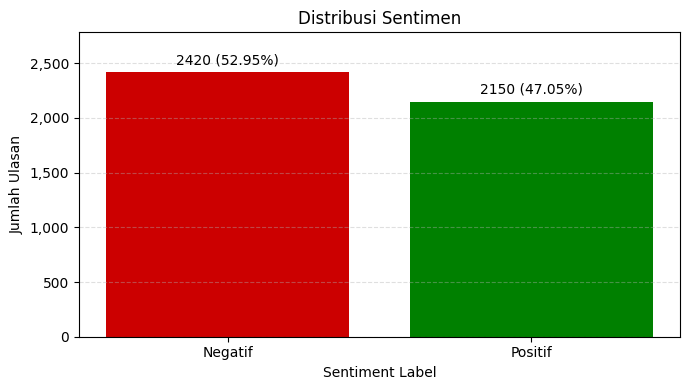

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung distribusi label
dist = df_filtered['sentiment_label'].value_counts().reset_index()
dist.columns = ['sentiment_label', 'jumlah']

# Hitung persentase
dist['persentase'] = (dist['jumlah'] / dist['jumlah'].sum() * 100).round(2)

# Urutkan label
dist = dist.sort_values('sentiment_label')

# Warna khusus:
# Positif = Hijau Muda (#90ee90)
# Negatif = Merah Muda (#ff9999)
colors = dist['sentiment_label'].map({
    'Positif': '#008000',   # hijau gelap
    'Negatif': '#cc0000'    # merah gelap
}).tolist()

# Plot
plt.figure(figsize=(7, 4))
plt.bar(dist['sentiment_label'], dist['jumlah'], color=colors)

# Format angka ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grid halus
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Tambah ruang di atas bar
plt.ylim(0, dist['jumlah'].max() * 1.15)

# Label dan judul
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Sentimen')

# Tampilkan angka + persentase
for index, row in dist.iterrows():
    plt.text(index,
             row['jumlah'] + dist['jumlah'].max() * 0.03,
             f"{row['jumlah']} ({row['persentase']}%)",
             ha='center')

plt.tight_layout()
plt.show()

### Konversi Label Teks ke Label Numerik

Bagian kode ini digunakan untuk mengubah label sentimen yang semula berbentuk teks ("Positif" dan "Negatif") menjadi angka (1 dan 0). Model NLP seperti IndoBERT hanya dapat memproses label dalam bentuk numerik, sehingga proses mapping ini wajib dilakukan sebelum training.

In [ ]:
label_mapping = {
    "Positif": 1,
    "Negatif": 0
}

df_filtered['sentiment_encoded'] = df_filtered['sentiment_label'].map(label_mapping)

# Cek hasil 10 data pertama
df_filtered.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded
0,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih? gw topup shopay uda...,byond bsi gangguan gasih gw topup shopay udah...,byond bsi masalah tidak sih gue isi ulang shop...,"[byond, bsi, masalah, tidak, sih, gue, isi, ul...","[masalah, tidak, sih, gue, isi, ulang, shopay,...","[masalah, tidak, sih, gue, isi, ulang, shopay,...",-4,Negatif,0
1,@blurbintang @worksfess Kalau kasus byond aku ...,@blurbintang @worksfess kalau kasus byond aku ...,kalau kasus byond aku kurang copy kak,kalau kasus byond akun kurang copy kak,"[kalau, kasus, byond, akun, kurang, copy, kak]","[akun, kurang, copy]","[akun, kurang, copy]",-1,Negatif,0
2,Halo min @bankbsi_id Saya melakukan pembayar s...,halo min @bankbsi_id saya melakukan pembayar s...,halo min saya melakukan pembayar shopee melal...,halo min saya melakukan pembayar shopee melalu...,"[halo, min, saya, melakukan, pembayar, shopee,...","[min, pembayar, shopee, kali, statusnya, pemba...","[min, bayar, shopee, kali, status, bayar, shop...",3,Positif,1
3,@asknownasaqueen @worksfess Kak nitip prtnyaan...,@asknownasaqueen @worksfess kak nitip prtnyaan...,kak nitip prtnyaan please ak mau nyoba nabun...,kak nitip prtnyaan please aku mau mencoba nabu...,"[kak, nitip, prtnyaan, please, aku, mau, menco...","[nitip, prtnyaan, please, mencoba, nabung, ema...","[nitip, prtnyaan, please, coba, nabung, emas, ...",-1,Negatif,0
4,@bankbsi_id min kok aplikasi byond by bsi gk b...,@bankbsi_id min kok aplikasi byond by bsi gk b...,min kok aplikasi byond by bsi gk bisa dibuka ...,min kok aplikasi byond by bsi tidak bisa dibuk...,"[min, kok, aplikasi, byond, by, bsi, tidak, bi...","[min, aplikasi, tidak, dibuka, siang, makan, t...","[min, aplikasi, tidak, buka, siang, makan, tidak]",-3,Negatif,0
5,@bankbsi_id Oke terima kasih Btw kartu ATM BSI...,@bankbsi_id oke terima kasih btw kartu atm bsi...,oke terima kasih btw kartu atm bsi saya hilan...,baik terima kasih omong-omong kartu atm bsi sa...,"[baik, terima, kasih, omong, omong, kartu, atm...","[terima, kasih, omong, omong, kartu, atm, hila...","[terima, kasih, omong, omong, kartu, atm, hila...",-2,Negatif,0
6,@bankbsi_id min ini saya input password BYOND ...,@bankbsi_id min ini saya input password byond ...,min ini saya input password byond x dengan sa...,min ini saya input kata sandi byond kali denga...,"[min, ini, saya, input, kata, sandi, byond, ka...","[min, input, sandi, kali, sadar, penuh, salah,...","[min, input, sandi, kali, sadar, penuh, salah,...",-3,Negatif,0
7,si byond kendala mulu dah,si byond kendala mulu dah,si byond kendala mulu dah,sih byond masalah mulu sudah,"[sih, byond, masalah, mulu, sudah]","[sih, masalah, mulu]","[sih, masalah, mulu]",-1,Negatif,0
8,@Arisjo @idextratime Kak knp ya hrgany beda sa...,@arisjo @idextratime kak knp ya hrgany beda sa...,kak knp ya hrgany beda sama di byond mana be...,kak kenapa ya hrgany beda sama di byond mana b...,"[kak, kenapa, ya, hrgany, beda, sama, di, byon...","[hrgany, beda, beda, masuk]","[hrgany, beda, beda, masuk]",-3,Negatif,0
9,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,ayodongg jypnation kosongin activityy setaun t...,"[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, set...","[ayodongg, jypnation, kosongin, activityy, tau...",-2,Negatif,0


### Contoh 5 Data Positif dan Negatif

In [ ]:
# === Contoh 5 Data Positif ===
contoh_positif = (
    df_filtered[df_filtered['sentiment_encoded'] == 1]
    .head(5)
)

print("=== Contoh Ulasan Positif ===")
display(contoh_positif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


# === Contoh 5 Data Negatif ===
contoh_negatif = (
    df_filtered[df_filtered['sentiment_encoded'] == 0]
    .head(5)
)

print("=== Contoh Ulasan Negatif ===")
display(contoh_negatif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])

=== Contoh Ulasan Positif ===


,normalisasi,sentiment_label,sentiment_encoded
2,halo min saya melakukan pembayar shopee melalu...,Positif,1
12,menggunakan jaringan internet mobile ya kak di...,Positif,1
13,pergantian makan kakak dapat melakukan transak...,Positif,1
14,dikirimkan sesuai dengan alamat yang terdaftar...,Positif,1
15,selamat pagi saya zidna nasabah bsi ingin memb...,Positif,1


=== Contoh Ulasan Negatif ===


,normalisasi,sentiment_label,sentiment_encoded
0,byond bsi masalah tidak sih gue isi ulang shop...,Negatif,0
1,kalau kasus byond akun kurang copy kak,Negatif,0
3,kak nitip prtnyaan please aku mau mencoba nabu...,Negatif,0
4,min kok aplikasi byond by bsi tidak bisa dibuk...,Negatif,0
5,baik terima kasih omong-omong kartu atm bsi sa...,Negatif,0


### Wordcloud Positif dan Negatif

#### Wordcloud Positif

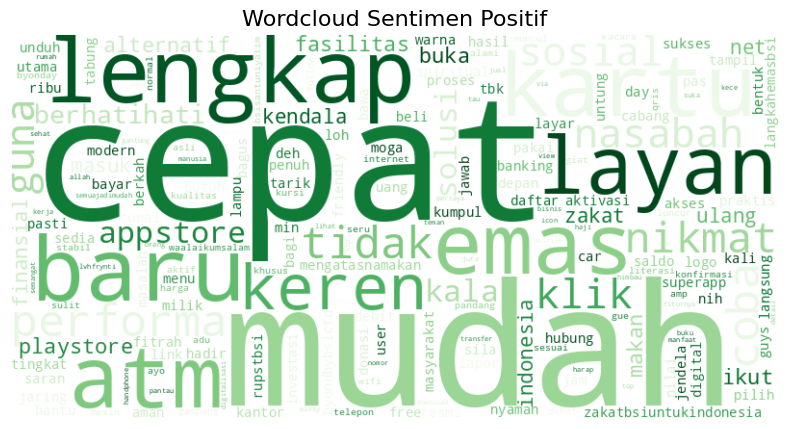

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# --- Stopword tambahan khusus wordcloud ---
stopword_wc = {
    "bsi", "byond", "bank", "syariah",
    "aplikasi", "apk", 'byondbybsi',
    "nya", "juga", "udah",
    "gak", "ga", 'cont',
    "sih", "saja", "aja",
    "untuk", "banget",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update",
    "customer", "service", "cs",
    "fitur", "login", "akun", "email",
    "transaksi", "rekening", "mobile"
}

# Gabungkan dengan stopword bawaan wordcloud
wc_stopwords = STOPWORDS.union(stopword_wc)

# Ambil token dari data POSITIF (hasil stemming)
positive_tokens = df_filtered[df_filtered['sentiment_encoded'] == 1]['stemming']

# Gabungkan semua token menjadi satu string
text_pos = " ".join([" ".join(tokens) for tokens in positive_tokens])

# Buat wordcloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens",     # hijau lembut
    stopwords=wc_stopwords,
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_pos)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [ ]:
from collections import Counter
import pandas as pd

# 1. Ambil data sentimen positif
data_positif = df_filtered[
    df_filtered['sentiment_encoded'] == 1
]['stemming']

# 2. Gabungkan seluruh token
all_words = [
    word
    for tokens in data_positif
    for word in tokens
    if word not in wc_stopwords and len(word) > 2
]

# 3. Hitung frekuensi kata
word_freq = Counter(all_words)

# 4. Ambil 5 kata teratas
top_5_words = word_freq.most_common(5)

# 5. Jadikan tabel
df_top_5 = pd.DataFrame(
    top_5_words,
    columns=['kata', 'jumlah_kemunculan']
)

df_top_5

,kata,jumlah_kemunculan
0,cepat,323
1,mudah,316
2,lengkap,298
3,baru,295
4,kartu,278


#### Wordcloud Negatif

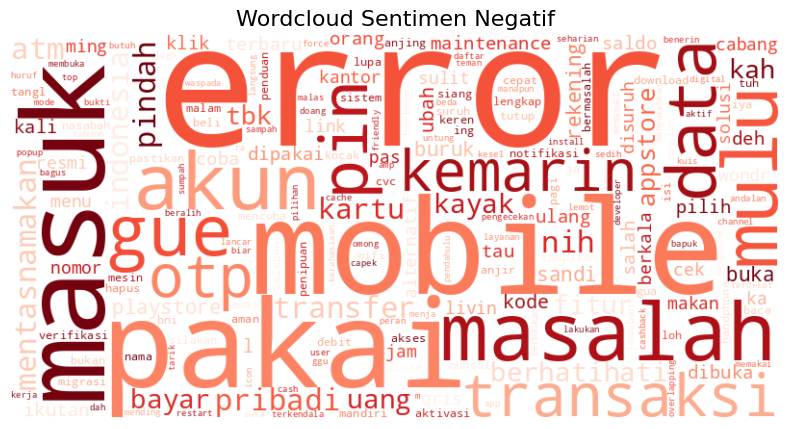

In [ ]:
# === Wordcloud Negatif ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud (hindari kata tidak bermakna)
stopword_wc = {
    "bsi", "byond", "byond!", "bank", "syariah",
    "aplikasi", "apk", 'tidak',
    "nya", "juga", "udah",
    "gak", "ga", "cont", "min",
    "sih", "saja", "aja",
    "untuk", "banget", "mengataskanamakan",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update"
}

# Gabungkan token negatif menjadi satu teks panjang
text_neg = " ".join(
    [" ".join(tokens) for tokens in df_filtered[df_filtered['sentiment_encoded'] == 0]['stopword_removal']]
)

# Hapus kata tidak penting
for sw in stopword_wc:
    text_neg = text_neg.replace(sw, "")

# Generate WordCloud negatif
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # warna merah lembut → cocok untuk negatif
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_neg)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=16)
plt.axis("off")
plt.show()

#### 5 Kata Teratas

In [ ]:
from collections import Counter
import pandas as pd

# 1. Ambil data sentimen negatif
data_negatif = df_filtered[
    df_filtered['sentiment_encoded'] == 0
]['stopword_removal']

# 2. Gabungkan seluruh token
all_words_neg = [
    word
    for tokens in data_negatif
    for word in tokens
    if word not in stopword_wc and len(word) > 2
]

# 3. Hitung frekuensi kata
word_freq_neg = Counter(all_words_neg)

# 4. Ambil 5 kata teratas
top_5_words_neg = word_freq_neg.most_common(5)

# 5. Jadikan tabel
df_top_5_neg = pd.DataFrame(
    top_5_words_neg,
    columns=['kata', 'jumlah_kemunculan']
)

df_top_5_neg

,kata,jumlah_kemunculan
0,error,642
1,mobile,339
2,pakai,297
3,masuk,253
4,masalah,248
